In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyrolite.plot import pyroplot
from pyrolite.util.synthetic import normal_frame, random_cov_matrix
from pyrolite.util.plot import save_figure
from pyrolite.util.plot.axes import share_axes
np.random.seed(12)

df = normal_frame(
    size=1000,
    cov=random_cov_matrix(sigmas=np.random.rand(4) * 2, dim=4, seed=12),
    seed=12,
)


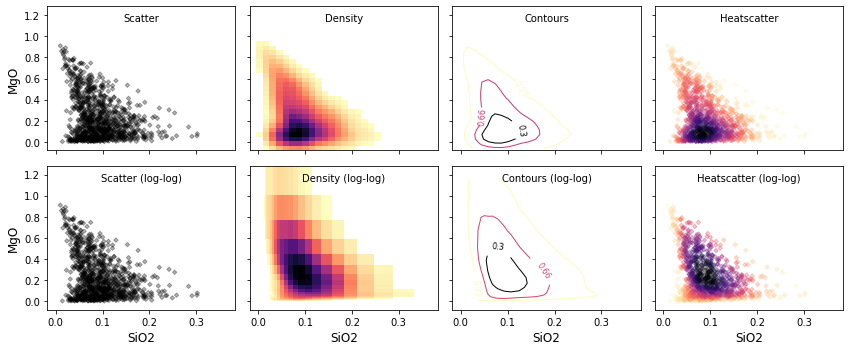

In [55]:
fig, ax = plt.subplots(2, 4, sharex=True, sharey=True, figsize=(12, 5))

ax = ax.flat
share_axes(ax[:4], which="xy")
share_axes(ax[4:8], which="xy")
share_axes(ax[8:], which="xy")

contours = [0.95, 0.66, 0.3]
bivar = ["SiO2", "MgO"]
kw = {"cmap": "magma_r"}
# linear-scaled comparison
df.loc[:, bivar].pyroplot.scatter(ax=ax[0], c="k", s=10, alpha=0.3)
df.loc[:, bivar].pyroplot.density(ax=ax[1], **kw)
df.loc[:, bivar].pyroplot.density(ax=ax[2], contours=contours, **kw)
df.loc[:, bivar].pyroplot.heatscatter(ax=ax[3], s=10, alpha=0.3, **kw)
# log-log plots
df.loc[:, bivar].pyroplot.scatter(ax=ax[4], c="k", s=10, alpha=0.3)
df.loc[:, bivar].pyroplot.density(ax=ax[5], logx=True, logy=True, **kw)
df.loc[:, bivar].pyroplot.density(
    ax=ax[6], contours=contours, logx=True, logy=True, **kw
)
df.loc[:, bivar].pyroplot.heatscatter(
    ax=ax[7], s=10, alpha=0.3, logx=True, logy=True, **kw
)
# ternary plots
"""
df.loc[:, trivar].pyroplot.density(ax=ax[9], bins=100, **kw)
df.loc[:, trivar].pyroplot.density(ax=ax[10], contours=contours, bins=100, **kw)
df.loc[:, trivar].pyroplot.heatscatter(ax=ax[11], s=10, alpha=0.3, renorm=True, **kw)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
"""
titles = ["Scatter", "Density", "Contours", "Heatscatter"]
for t, a in zip(titles + [i + " (log-log)" for i in titles], ax):
    a.text(0.5, 0.95, t, ha='center', va='top', transform=a.transAxes)
    
for a in ax[:4]:
    a.set_xlabel(None)
    #a.set_xtick
for a in list(ax[1:4]) + list(ax[5:8]):
    a.set_ylabel(None)
plt.tight_layout()
save_figure(fig, name='grid_xy', save_fmts=['png'], dpi=600)

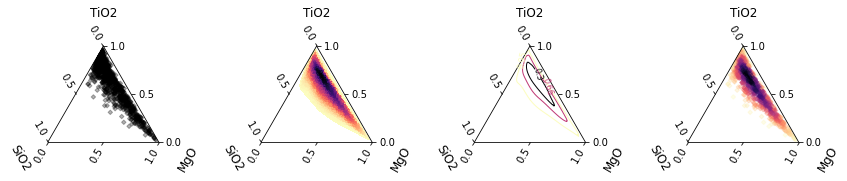

In [58]:
fig, ax = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(12, 5))

ax = ax.flat

contours = [0.95, 0.66, 0.3]
trivar = ["TiO2", "SiO2", "MgO"]
kw = {"cmap": "magma_r"}

df.loc[:, trivar].pyroplot.scatter(ax=ax[0], c="k", s=10, alpha=0.3)
df.loc[:, trivar].pyroplot.density(ax=ax[1], bins=100, **kw)
df.loc[:, trivar].pyroplot.density(ax=ax[2], contours=contours, bins=100, **kw)
df.loc[:, trivar].pyroplot.heatscatter(ax=ax[3], s=10, alpha=0.3, renorm=True, **kw)
#fig.subplots_adjust(hspace=0.4, wspace=0.4)

plt.tight_layout()
save_figure(fig, name='grid_ternary', save_fmts=['png'], dpi=600)

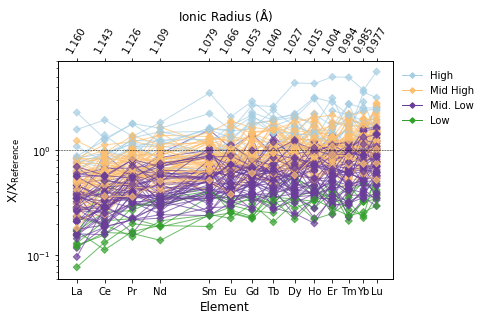

In [71]:
from pyrolite.util.synthetic import example_spider_data
from pyrolite.plot.color import process_color
from pyrolite.util.plot.legend import proxy_line

normdf = example_spider_data(start="DM_SS2004", norm_to="PM_PON")

labels = pd.cut(
    np.log(normdf["Cs"]), bins=4, labels=["Low", "Mid. Low", "Mid High", "High"]
)
np.unique(labels)

ax = normdf.pyroplot.REE(
    unity_line=True,
    index_order="incompatibility",
    color=labels,  # a categorical set of values
    cmap="Paired",
    alpha=0.7,
    figsize=(6, 4),
)

legend_labels = np.unique(labels)  # process_color uses this behind the scenes

proxy_colors = process_color(color=legend_labels, cmap="Paired")["c"]

legend_proxies = [proxy_line(color=c, marker="D") for c in proxy_colors]

proxies = {
    label: proxy_line(color=c, marker="D")
    for label, c in zip(legend_labels, proxy_colors)
}

ordered_labels = ["High", "Mid High", "Mid. Low", "Low"]

ax.legend([proxies[l] for l in ordered_labels], ordered_labels)

plt.show()
save_figure(ax.figure, name='REE_spider', save_fmts=['png'], dpi=600)